# Lista 1 de Ejercicios

### Objetivo:
Estos ejercicios pretenden poner en práctica la habilidad del estudiante para crear un modelo sencillo pero completo _end2end_ con la librería __sklearn__ mediante el uso de transformadores _ad hoc_, una batería de algoritmos y un tuneado de parámetros.

### Tarea del estudiante:

#### Lee detenidamente las siguientes instrucciones
En cada trozo de código debes responder a la pregunta formulada, asegurándote de que el resultado queda guardado en la(s) variable(s) indicadas que, por defecto, vienen inicializadas a `None`. Puedes usar variables intermedias siempre que el resultado final del cálculo quede guardado exactamente en la variable que indica el enunciado (debes reemplazar `None` el código necesario, pero nunca cambiar el nombre de las variables ya creadas).

Después de cada apartado verás _celdas de control_. Ejecútalas todas y no modifiques su código. Éstas te dirán si tu solución va por buen camino. Así, si la solución es incorrecta, verás un error indicando cuál es el _assert_ que tu solución no pasa. Además de esas pruebas, se realizarán algunas más (ocultas) a la hora de puntuar el ejercicio. 

Una vez finalizada la actividad, guarda tu fichero, ciérralo con `File -> Close and Halt`, y después vuélvelo a abrir y ejecútalo completo pinchando en `Cell -> Run All Cells`, y **asegúrate de que no se lanza ningún error. De esta manera comprobarás que no has olvidado nada y que es posible ejecutarlo completo desde 0 y sin errores**. Finalmente, **TODO EL CÓDIGO DEBE ESTAR EJECUTADO (EN ORDEN) EN EL FICHERO QUE ENTREGÁIS**. 

RECUERDA SUBIR CADA UNO DE LOS FICHEROS .ipynb TAL CUAL (sueltos), SIN COMPRIMIR Y SIN CAMBIARLES EL NOMBRE. Los ficheros subidos deben tener **exactamente el mismo nombre de fichero que tenían cuando los recibiste**. No subas ningún PDF ni ningún fichero ZIP ni nada similar. La plataforma ya los separa automáticamente en carpetas que traen el nombre y apellidos del alumno, por lo que NO es necesario que lo pongas en ninguna parte. 

### Evaluación: 
Esta tarea tiene una puntuación de 6 puntos. 
La suma de todos los puntos obtenidas de todos los notebooks se ponderará sobre 10 puntos para computar la nota final del estudiante.

## Parte 0: Inicialización

En esta parte, simplemente cargamos las librerías que vamos a utilizar y establecemos una semilla para controlar la reproducibilidad del ejercicio.

In [1]:
""" Librerías """

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys

sns.set_style('darkgrid')
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

""" Semilla """

seed = 99

Comprobamos que tenemos el entorno virtual correctamente creado en la siguiente celda. Si fallase alguno de los *asserts*, significaría que no tenemos la versión correcta:

In [ ]:
assert sys.version[0:4] == '3.10'
assert sklearn.__version__ == '1.5.2'
assert matplotlib.__version__ == '3.9.2'
assert sns.__version__ == '0.13.2'
assert pd.__version__ == '2.2.3'
assert np.__version__ == '2.1.2'

## Parte 1: Lectura y transformación de datos (1.5 puntos)

En esta parte, principalmente, cargaremos los datos de un repositorio git y realizaremos una breve limpieza de los datos para conseguir un dataframe listo.

Utilizaremos dos variables: _data_, para la lectura original del fichero, y _df_ que será con la que avancemos en la tarea.

In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/eduardofc/data/main/titanic-2.csv')

print(f'Número de filas: {data.shape[0]}, Número de columnas:{data.shape[1]}')
df = data.copy()
df.head()

Número de filas: 891, Número de columnas:13


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Se pide en esta celda, crear una columna adicional, llamada _hasCabin_, que tome valor 0 si la columna _Cabin_ es nula, y 1 si no lo es. Después, eliminar las columnas _PassengerId_, _Name_, _Cabin_ y _Ticket_.

In [21]:
### Codigo del estudiante
df["Cabin"] = df["Cabin"].fillna(0)
df["hasCabin"] = df["Cabin"].apply(lambda x: 0 if x == 0 else 1)
df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], inplace=True)


Celda de control:

In [22]:
key_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'hasCabin']

assert sum([x in key_cols for x in df.columns]) == 10
assert len(df.columns) == 10
assert (df.groupby('hasCabin').size()[0], df.groupby('hasCabin').size()[1]) == (687, 204)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,hasCabin
0,0,3,male,22.0,1,0,7.2500,S,Mr,0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1
4,0,3,male,35.0,0,0,8.0500,S,Mr,0


Se pide en esta celda, eliminar los dos registros cuyo valor _Embarked_ es nulo. Tras ello, eliminar todos los duplicados.

In [23]:
### Codigo del estudiante
df.dropna(subset=['Embarked'], inplace=True)
df.drop_duplicates(inplace=True)

Celda de control:

In [25]:
assert len(df) == 788
assert df.Age.isnull().sum() == 109
assert df.duplicated().sum() == 0

En esta celda se pide, almacenar en una variable llamada *col_transformer* un ColumnTransformer que lleve en orden:
- Un KNN Imputer de 5 vecinos con métrica *nan_euclidean* y pesos uniformes, para _Pclass_, _Age_, _SibSp_, _Fare_.
- Un OneHotEncoder para las variables categóricas:
    - _Sex_ (con la opción *drop=if_binary*), 
    - _Embarked_ (con la opción *drop=first*), 
    - _Parch_ (con la opción de _handle_unknown=ignore_) y, 
    - _Title_ con las categorías _Mr_, _Mrs_ y _Miss_ (y con la opción de _handle_unknown=ignore_).

El ColumnTransfomer tiene una opción llamada _reminder_ que asignaremos a valor _passthrough_ en este ejercicio. Se recomienda al estudiante investigar lo que significa en la documentación. Por defecto, la opción _drop_ es la que ColumnTransformer tiene activada. 

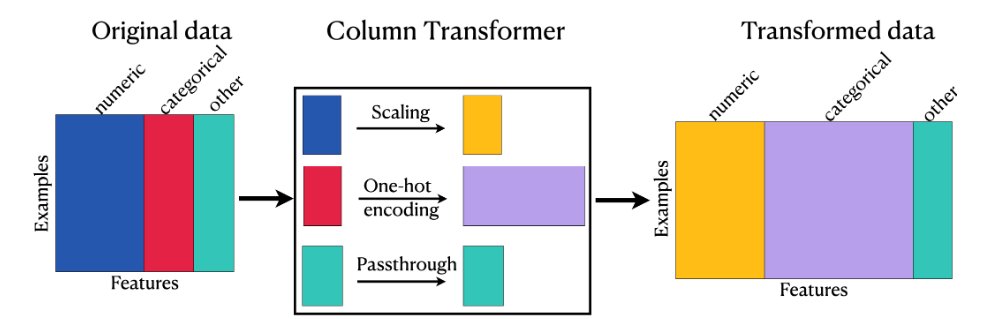

_Nota_: Para que la celda de control no falle, es importante poner en orden tanto los transformadores como las variables.

In [29]:
### Codigo del estudiante
# col_transformer = ColumnTransformer([
#     ("imputer", KNNImputer(n_neighbors=5, metric='nan_euclidean', weights='uniform'), ['Pclass', 'Age', 'SibSp', 'Fare']),
#     ("enc1", OneHotEncoder(drop='if_binary'), ['Sex']),
#     ("enc2", OneHotEncoder(drop='first'), ['Embarked']),
#     ("enc3", OneHotEncoder(categories=[[0,1,2,3,4,5,6]], handle_unknown='ignore'), ['Parch']),
#     ("enc4", OneHotEncoder(categories=[['Mr', 'Mrs', 'Miss']], handle_unknown='ignore'), ['Title'])
# ], remainder='passthrough')


titles = [["Mr", "Mrs", "Miss"]]

col_transformer = ColumnTransformer([
    ("imputer", KNNImputer(n_neighbors=5, metric='nan_euclidean', weights='uniform'), ['Pclass', 'Age', 'SibSp', 'Fare']),
    ("enc1", OneHotEncoder(drop="if_binary"), ["Sex"]),
    ("enc2", OneHotEncoder(drop="first"), ["Embarked"]),
    ("enc3", OneHotEncoder(handle_unknown="ignore"), ["Parch"]),
    ("enc4", OneHotEncoder(categories=titles, handle_unknown="ignore"), ["Title"])
    ], remainder="passthrough" # Keep the rest of the columns unchanged
)

ctransformed = col_transformer.fit_transform(df)
print(col_transformer.get_feature_names_out())
ctransformed[:3]

['imputer__Pclass' 'imputer__Age' 'imputer__SibSp' 'imputer__Fare'
 'enc1__Sex_male' 'enc2__Embarked_Q' 'enc2__Embarked_S' 'enc3__Parch_0'
 'enc3__Parch_1' 'enc3__Parch_2' 'enc3__Parch_3' 'enc3__Parch_4'
 'enc3__Parch_5' 'enc3__Parch_6' 'enc4__Title_Mr' 'enc4__Title_Mrs'
 'enc4__Title_Miss' 'remainder__Survived' 'remainder__hasCabin']


array([[ 3.  , 22.  ,  1.  ,  7.25,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 1.  , 38.  ,  1.  , 71.28,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         1.  ],
       [ 3.  , 26.  ,  0.  ,  7.92,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         0.  ]])

Celda de control:

In [ ]:
assert ctransformed.shape == (788, 19)
assert sum(np.round(ctransformed[1],2) == [1., 38., 1., 71.28, 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.]) == 19
assert sum(np.round(ctransformed[100],2) == [3., 22., 0., 7.78, 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.]) == 19

## Parte 2: Selección de modelo (1.5 puntos)

En esta parte, evaluaremos diversos estimadores (algoritmos, transformadores+algoritmos) con el objeto de predecir la variable objetivo (_Survived_) y estudiar su comportamiento.

In [33]:
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DTC', DecisionTreeClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier(random_state=seed)))
models.append(('SVM', SVC()))

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'hasCabin']]
y = df['Survived']

def boxplots_algorithms(results, names):

    plt.figure(figsize=(9, 3))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.show()

En esta celda se pide, realizar un bucle que calcule, para cada algoritmo de la variable _models_,

- Un pipeline que realice:
    1. El ColumnTransformer diseñado anteriormente
    2. Un RobustScaler a continuación y, finalmente,
    3. Evalue cada algoritmo con _scoring='accuracy'_.

- Una validación cruzada:
    1. Tipo KFolds, con 10 _folders_, y
    2. Aleatorio con semilla _seed_.
        
En cada iteración del bucle, almacenar el resultado de cada validación cruzada en una variable _results_ y los nombres de cada algoritmo en una variable _names_.

Finalmente, usaremos la función *boxplots_algorithms* para dibujar los resultados.

*Nota*: Quizá os haya llamado la atención el RobustScaler. En realidad, no sería muy necesario introducirlo. Sin embargo, se deja por motivos didácticos, para que practiquéis y veáis que también se pueden combinar en un mismo pipeline, tanto transformadores sencillos, como columnTransformers. Por otra parte, fuera de la evaluación, dejo al estudiante que practique quitando el RobustScaler y explore las diferencias. Además, también dejo al estudiante que explore las diferencias de aplicar o no el passthrogh comentado anteriormente.

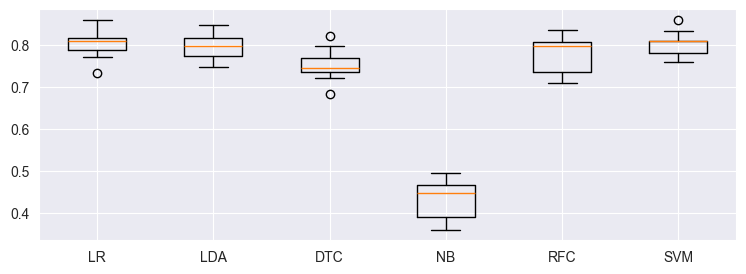

In [34]:
results = []
names = []

### Codigo del estudiante
for name, model in models:
    pipeline = Pipeline([
        ('transformer', col_transformer),
        ('scaler', RobustScaler()),
        ('model', model)
    ])
    
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)

Celda de control:

In [ ]:
assert len(results) == len(models)
assert [np.round(x[4],2) for x in results] == [0.80, 0.80, 0.70, 0.49, 0.70, 0.77]

## Parte 3: Tuneado del modelo (3 puntos)

En esta parte, elegiremos un modelo compuesto por transformaciones y un algoritmo seleccionado. En concreto, probaremos diferentes parametrizaciones del algoritmo para obtener la mejor métrica.

En esta celda se pide, realizar un tuneado del `RandomForestClassifier` con `GridSearchCV` para estimar cuál es la mejor configuración paramétrica entre:

- 10 y 20 estimadores,
- maximo número de variables estimado con los algoritmos _auto_, _sqrt_ y _log2_,
- máxima profundidad 4,5,6,7 u 8,
- criterio para medir la calidad del _split_ entre _gini_ o _entropy_.
    
El modelo final, entrenado con `GridSearchCV` y las variables _(X, y)_, se almacenará en una variable llamada `grid_model`.

El entrenamiento del modelo se hará con un `StratifiedKfolds` de 10 folders aleatorio y estratificado por la variable categórica _y_.

Se utilizará un `Pipeline` con el transformador de columnas del apartado anterior y el modelo de *Random Forest* (sin `RobustScaler`).

Nota 1: No olvidar usar semilla cuando aplique.

Nota 2: En este ejercicio no haremos ningún *train-test split*.

Nota 3: El diccionario de parámetros, cuando es un _pipeline_, hay que definir para cuál de las fases del _pipeline_ deben aplicarse los parámetros. En este ejercicio, los parámetros son del algoritmo, por lo que todos los parámetros deben llevar el sufijo "_model_ " y dos guiones bajos "_" (donde _model_ es el nombre del algoritmo definido en el pipeline -es recomendable investigar esta parte-).

In [36]:
grid_model = None

### Codigo del estudiante
pipeline = Pipeline([
    ('transformer', col_transformer),
    ('model', RandomForestClassifier(random_state=seed))
])

param_grid = {
    'model__n_estimators': [10, 20],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth': [4, 5, 6, 7, 8],
    'model__criterion': ['gini', 'entropy']
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

grid_model = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_model.fit(X, y)

print(grid_model.best_score_)
print(grid_model.best_estimator_)

0.8071892242778318
Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer', KNNImputer(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Fare']),
                                                 ('enc1',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Sex']),
                                                 ('enc2',
                                                  OneHotEncoder(drop='first'),
                                                  ['Embarked']),
                                                 ('enc3',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Parch']),
                                                 ('enc4',
     

Celda de control:

In [37]:
assert np.round(grid_model.best_score_, 4) == 0.8072
assert len(grid_model.best_estimator_.steps) == 2